In [3]:
from scipy.integrate import simps
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
delta_p = 4.2 * 10**6    # over-pressure
tau_y = 5.62             # yield stress pa

In [5]:
# dimensionless lost circulation parameters
# Dimensionless_a = [0.0001,0.008,0.001]  The original dimensionless group

Dimensionless_a = [0.0001,0.001,0.008]


In [6]:
f = lambda x: 2.**((m+1)/m)*x*(((x**(1-m))-1)/(1-m))**(1/m)/(1-a*(x-1))**(1/m)

In [7]:
# calculation time step
# dynamic list append
Rad_d =  []
Time_d = []

In [8]:
for k,v in enumerate(Dimensionless_a):
    
    Radius_d_init = 1.1                            # the initial R_d
    Radius_d_alti = 1 + 1./v                       # the altimate R_d

    Radius_d = np.arange(Radius_d_init, Radius_d_alti)
    total_time_step = len(Radius_d)
    # calculation the time step matrices
    Rad_d.append(Radius_d)

In [9]:
for k,a in enumerate(Dimensionless_a):
    Y = [quad(f,1.01,int_val)[0] for int_val in Rad_d[k]]
    Time_d.append(Y)

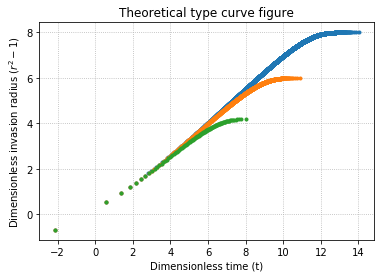

In [10]:
fig, ax3 = plt.subplots()
# plt.figure(figsize=(10,8))
for i in range(len(Dimensionless_a)):
    plt.plot(np.log10(Time_d[i]),np.log10(Rad_d[i]**2 - 1), '.')
    
plt.title('Theoretical type curve figure')
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius $({r^2 - 1})$')
# plt.legend()

ax3.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax3.yaxis.grid(True, which = 'Major', linestyle='dotted') 

# Theoretical type curve

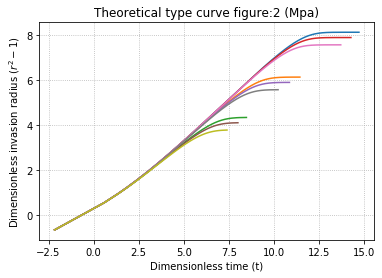

In [11]:
import pandas as pd

# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
delta_p = 3.2 * 10**6    # over-pressure
tau_y = 5.62             # yield stress pa
r_w = 311.2 /2 /1000     # wellbore radius

delta_ps = [4.2*10**6, 3.2*10**6, 2.2*10**6]
# calculation time step
# dynamic list append
Rad_ds = {}
Time_ds = {}

A = []
B = []

for delta_p in delta_ps:
    Rad_ds['%i' % delta_p] = []
    Time_ds['%i' % delta_p] = []

    
# iterate the pressure
for j, delta_p in enumerate(delta_ps):
    # dimensionless lost circulation parameters
    # Dimensionless_a = [0.0001,0.008,0.001]  The original dimensionless group
    # Dimensionless_a = [0.0001,0.001,0.008]

    width = [0.00677, 0.000677, 0.000085]
#     # w = lambda a: (2*m+1)/(m+1)*(2*r_w)/a*tau_y/delta_p
#     width = [w(a) for a in Dimensionless_a]

    a = lambda w: (2*m+1)/(m+1)*(2.*r_w)/w*tau_y/delta_p
    Dimensionless_a = [a(w) for w in width ]
    
    for k,v in enumerate(Dimensionless_a):

        Radius_d_init = 1.1                            # the initial R_d
        Radius_d_alti = 1 + 1./v                       # the altimate R_d

        Radius_d = np.arange(Radius_d_init, Radius_d_alti)
        total_time_step = len(Radius_d)
        # calculation the time step matrices
        Rad_ds['%i' % delta_p].append(Radius_d);
        A.append(Radius_d)

    # seven matrices
    # use quad integration

    for k,a in enumerate(Dimensionless_a):
        Y = [quad(f,1.01,int_val)[0] for int_val in Rad_ds['%i' % delta_p][k]]
        Time_ds['%i' % delta_p].append(Y)
        B.append(Y)

# R_d = np.array(R_d)
# T_d = np.array(T_d)

R_d = pd.DataFrame(Rad_ds)
T_d = pd.DataFrame(Time_ds)

#plt.figure(figsize=(10,8))
figure, ax3 = plt.subplots()
for i in delta_ps:         # iterate for delta_ps
    for j in range(len(Dimensionless_a)):     # iterate for dimensionless_a
        plt.plot(np.log10(T_d['%i'%i][j][:]),np.log10(R_d['%i'%i][j][:]**2 - 1), '-')

plt.title('Theoretical type curve figure:%i (Mpa)' %(delta_p/1000000.))
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius $({r^2 - 1})$')
# plt.legend()

ax3.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax3.yaxis.grid(True, which = 'Major', linestyle='dotted') 

# Good time_step algorithm.
# Radius_d  the fluid invasion radius.
plt.ioff()

In [12]:
import sklearn
from sklearn.manifold import TSNE

In [14]:
data = pd.DataFrame()

for i in range(len(A)):
    if i == 0:
        data[i] = A[i]
    else:
        data[i] = pd.Series(A[i])
        
data.fillna(method = 'ffill', axis = 0, inplace = True)

In [15]:
Value = np.log10(data**2 - 1)

In [16]:
data = np.log(data)

In [17]:
c = np.array([])
for i in range(len(A)):
    c = np.vstack(A[i])
        

In [18]:
data.shape

(11664, 9)

In [ ]:
AXI = np.log10(B[0])
plt.scatter(AXI, Value[0])

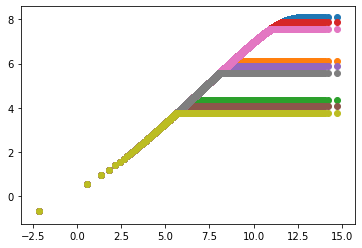

In [21]:
for i in range(9):

    plt.scatter(AXI, Value[i])

In [22]:
new = Value.set_index(AXI)


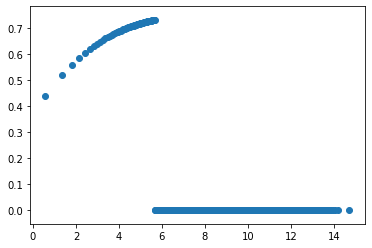

In [63]:
new['distance'] = AXI

XX = (new - new.shift(1)).dropna()

for i in range(9):
    XX[i]/=XX['distance']

plt.scatter(XX.index, XX[8][:])

In [41]:
# del XX['distance']
df = XX.unstack().reset_index()
df.columns = ['x', 'y', 'z']

df['x'] = pd.Categorical(df['x'])
df['x'] = df['x'].cat.codes

Text(0.5, 0, 'dimensionless slope')

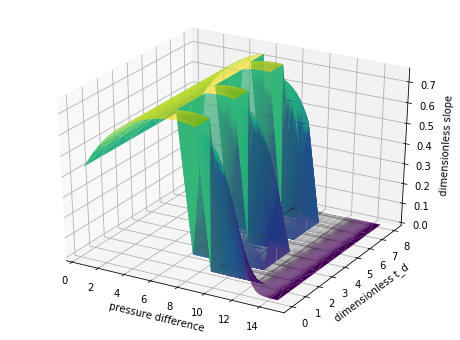

In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# for angle in range(70,210,2):
fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['y'], df['x'], df['z'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('pressure difference')
ax.set_ylabel('dimensionless t_d')
ax.set_zlabel('dimensionless slope')
plt.show()

In [142]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

11663

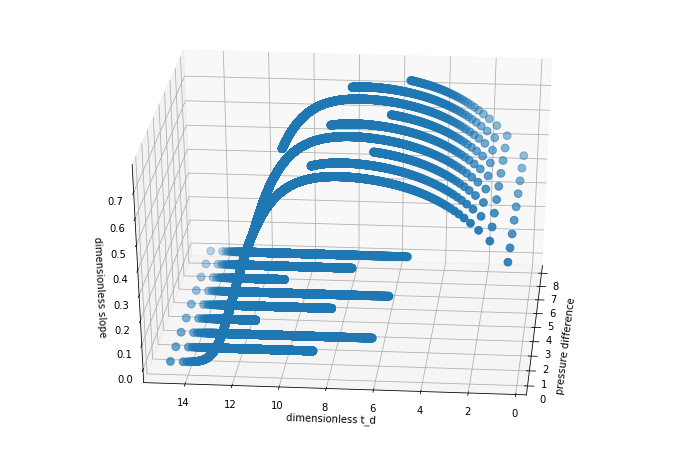

In [53]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], df['z'], cmap=plt.cm.viridis, s=60)
ax.view_init(30, 185)
ax.set_xlabel('pressure difference')
ax.set_ylabel('dimensionless t_d')
ax.set_zlabel('dimensionless slope')
plt.show()

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['y'], df['x'], df['z'], cmap=plt.cm.viridis, linewidth=0.2)

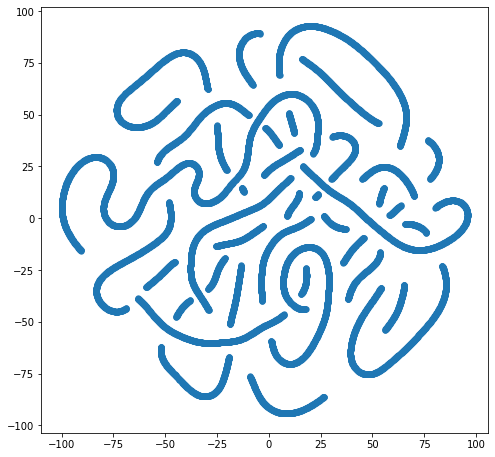

In [51]:
f = plt.figure(figsize=(8,8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(dig_proj[:,0], dig_proj[:,1], lw=0, s=40)

In [112]:
import seaborn as sns
palette = np.array(sns.color_palette('hls', 10))

In [103]:
P = np.arange(11664)

In [104]:
len(P)

11664

## New Chapter

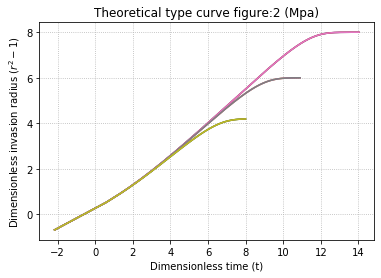

In [57]:
import pandas as pd

# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
delta_p = 3.2 * 10**6    # over-pressure
tau_y = 5.62             # yield stress pa
r_w = 311.2 /2 /1000     # wellbore radius

delta_ps = [4.2*10**6, 3.2*10**6, 2.2*10**6]
# calculation time step
# dynamic list append
Rad_ds = {}
Time_ds = {}

A = []
B = []

for delta_p in delta_ps:
    Rad_ds['%i' % delta_p] = []
    Time_ds['%i' % delta_p] = []

    
# iterate the pressure
for j, delta_p in enumerate(delta_ps):
    # dimensionless lost circulation parameters
    # Dimensionless_a = [0.0001,0.008,0.001]  The original dimensionless group
    # Dimensionless_a = [0.0001,0.001,0.008]

#    width = [0.00677, 0.000677, 0.000085]
#     # w = lambda a: (2*m+1)/(m+1)*(2*r_w)/a*tau_y/delta_p
#     width = [w(a) for a in Dimensionless_a]
#     a = lambda w: (2*m+1)/(m+1)*(2.*r_w)/w*tau_y/delta_p
#     Dimensionless_a = [a(w) for w in width ]

    Dimensionless_a = [0.0001,0.001,0.008]
    
    for k,v in enumerate(Dimensionless_a):

        Radius_d_init = 1.1                            # the initial R_d
        Radius_d_alti = 1 + 1./v                       # the altimate R_d

        Radius_d = np.arange(Radius_d_init, Radius_d_alti)
        total_time_step = len(Radius_d)
        # calculation the time step matrices
        Rad_ds['%i' % delta_p].append(Radius_d);
        A.append(Radius_d)

    # seven matrices
    # use quad integration

    for k,a in enumerate(Dimensionless_a):
        Y = [quad(f,1.01,int_val)[0] for int_val in Rad_ds['%i' % delta_p][k]]
        Time_ds['%i' % delta_p].append(Y)
        B.append(Y)

# R_d = np.array(R_d)
# T_d = np.array(T_d)

R_d = pd.DataFrame(Rad_ds)
T_d = pd.DataFrame(Time_ds)

#plt.figure(figsize=(10,8))
figure, ax3 = plt.subplots()
for i in delta_ps:         # iterate for delta_ps
    for j in range(len(Dimensionless_a)):     # iterate for dimensionless_a
        plt.plot(np.log10(T_d['%i'%i][j][:]),np.log10(R_d['%i'%i][j][:]**2 - 1), '-')

plt.title('Theoretical type curve figure:%i (Mpa)' %(delta_p/1000000.))
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius $({r^2 - 1})$')
# plt.legend()

ax3.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax3.yaxis.grid(True, which = 'Major', linestyle='dotted') 

# Good time_step algorithm.
# Radius_d  the fluid invasion radius.
plt.ioff()

In [60]:
data = pd.DataFrame()

for i in range(len(A)):
    if i == 0:
        data[i] = A[i]
    else:
        data[i] = pd.Series(A[i])
        
data.fillna(method = 'ffill', axis = 0, inplace = True)

Value = np.log10(data**2 - 1)

AXI = np.log10(B[0])
plt.scatter(AXI, Value[0])

9

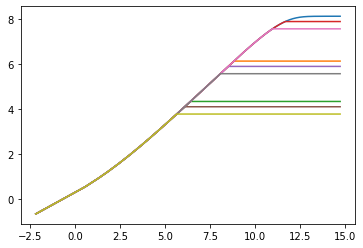

In [62]:
for i in range(9):

    plt.plot(AXI, Value[i])

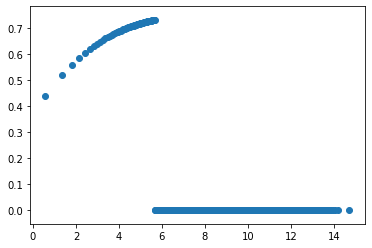

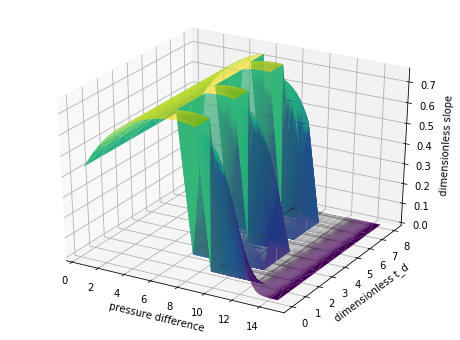

In [64]:
new = Value.set_index(AXI)

new['distance'] = AXI

XX = (new - new.shift(1)).dropna()

for i in range(9):
    XX[i]/=XX['distance']

plt.scatter(XX.index, XX[8][:])
del XX['distance']
df = XX.unstack().reset_index()
df.columns = ['x', 'y', 'z']

df['x'] = pd.Categorical(df['x'])
df['x'] = df['x'].cat.codes

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# for angle in range(70,210,2):
fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['y'], df['x'], df['z'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('pressure difference')
ax.set_ylabel('dimensionless t_d')
ax.set_zlabel('dimensionless slope')
plt.show()

In [65]:
new.shape

(11664, 10)

In [71]:
new.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 'distance'], dtype='object')

In [73]:
del new['distance']

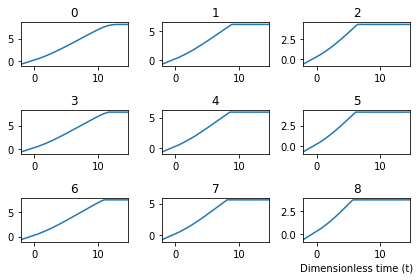

In [88]:
nrows, ncols = 3, 3

for i in range(nrows*ncols):
    ax = plt.subplot(nrows, ncols, i+1, title = i)
    new[i].plot()

ax.set_xlabel('Dimensionless time (t)')
plt.tight_layout()

In [90]:
columnsTitle = [0, 3, 6, 1, 4, 7, 2, 5, 8]

In [91]:
new = new.reindex(columns = columnsTitle)

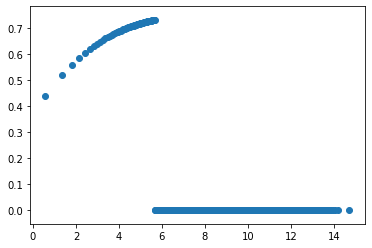

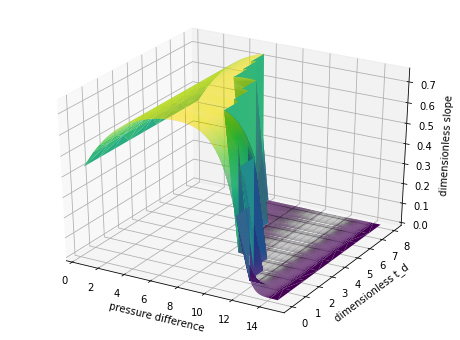

In [106]:
new = Value.set_index(AXI)

new['distance'] = AXI

XX = (new - new.shift(1)).dropna()

for i in range(9):
    XX[i]/=XX['distance']

plt.scatter(XX.index, XX[8][:])
del XX['distance']

columnsTitle = [0, 3, 6, 1, 4, 7, 2, 5, 8]
XX = XX.reindex(columns = columnsTitle)

XX.columns = [0,1,2,3,4,5,6,7,8]

df = XX.unstack().reset_index()
df.columns = ['x', 'y', 'z']

df['x'] = pd.Categorical(df['x'])
df['x'] = df['x'].cat.codes

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# for angle in range(70,210,2):
fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['y'], df['x'], df['z'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('pressure difference')
ax.set_ylabel('dimensionless t_d')
ax.set_zlabel('dimensionless slope')
plt.show()

,0,1,2,3,4,5,6,7,8
0.581378,0.440743,0.440743,0.440743,0.440743,0.440743,0.440743,0.440743,0.440743,0.440743
1.354035,0.520605,0.520605,0.520605,0.520605,0.520605,0.520605,0.520605,0.520605,0.520605
1.824652,0.560814,0.560814,0.560814,0.560814,0.560814,0.560814,0.560814,0.560814,0.560814
2.163848,0.587218,0.587218,0.587218,0.587218,0.587218,0.587218,0.587218,0.587218,0.587218
2.428959,0.606218,0.606218,0.606218,0.606218,0.606218,0.606218,0.606218,0.606218,0.606218
2.646438,0.620686,0.620686,0.620686,0.620686,0.620686,0.620686,0.620686,0.620686,0.620686
2.830706,0.632150,0.632150,0.632150,0.632150,0.632150,0.632150,0.632150,0.632150,0.632150
2.990497,0.641505,0.641505,0.641505,0.641505,0.641505,0.641505,0.641505,0.641505,0.641505
3.131503,0.649315,0.649315,0.649315,0.649315,0.649315,0.649315,0.649315,0.649315,0.649315
3.257643,0.655957,0.655957,0.655957,0.655957,0.655957,0.655957,0.655957,0.655957,0.655957
